<a href="https://colab.research.google.com/github/innovativenexusbd/AgroAI/blob/main/feedbackprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

**Load, Prepare and Split the Feedback Data**

In [5]:
feedback_df = pd.read_csv('feedback_data.csv')
X = feedback_df[['Year']].values
y_customer = feedback_df['CustomerFeedback'].values
y_business = feedback_df['BusinessFeedback'].values
X_train, X_test, y_customer_train, y_customer_test, y_business_train, y_business_test = train_test_split(X, y_customer, y_business, test_size=0.2, random_state=42)

**Initialize Support Vector Regressors and Train the Models**

In [6]:
customer_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
business_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
customer_svr.fit(X_train, y_customer_train)
business_svr.fit(X_train, y_business_train)

SVR(C=100, gamma=0.1)

**Prediction and Creating Future Feedback Dataframe**

In [7]:
future_years = np.arange(2024, 2026).reshape(-1, 1)
future_customer_feedback = customer_svr.predict(future_years)
future_business_feedback = business_svr.predict(future_years)
future_customer_feedback = np.clip(future_customer_feedback, 1, 10)
future_business_feedback = np.clip(future_business_feedback, 1, 10)
future_feedback_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'PredictedCustomerFeedback': future_customer_feedback,
    'PredictedBusinessFeedback': future_business_feedback
})

**Saving the Prediction Data**

In [8]:
future_feedback_df.to_csv('future_feedback_analysis.csv', index=False)
print("Future Feedback Analysis:")
print(future_feedback_df)

Future Feedback Analysis:
   Year  PredictedCustomerFeedback  PredictedBusinessFeedback
0  2024                       10.0                   4.579794
1  2025                       10.0                   3.900721


**Visualizing the Data**

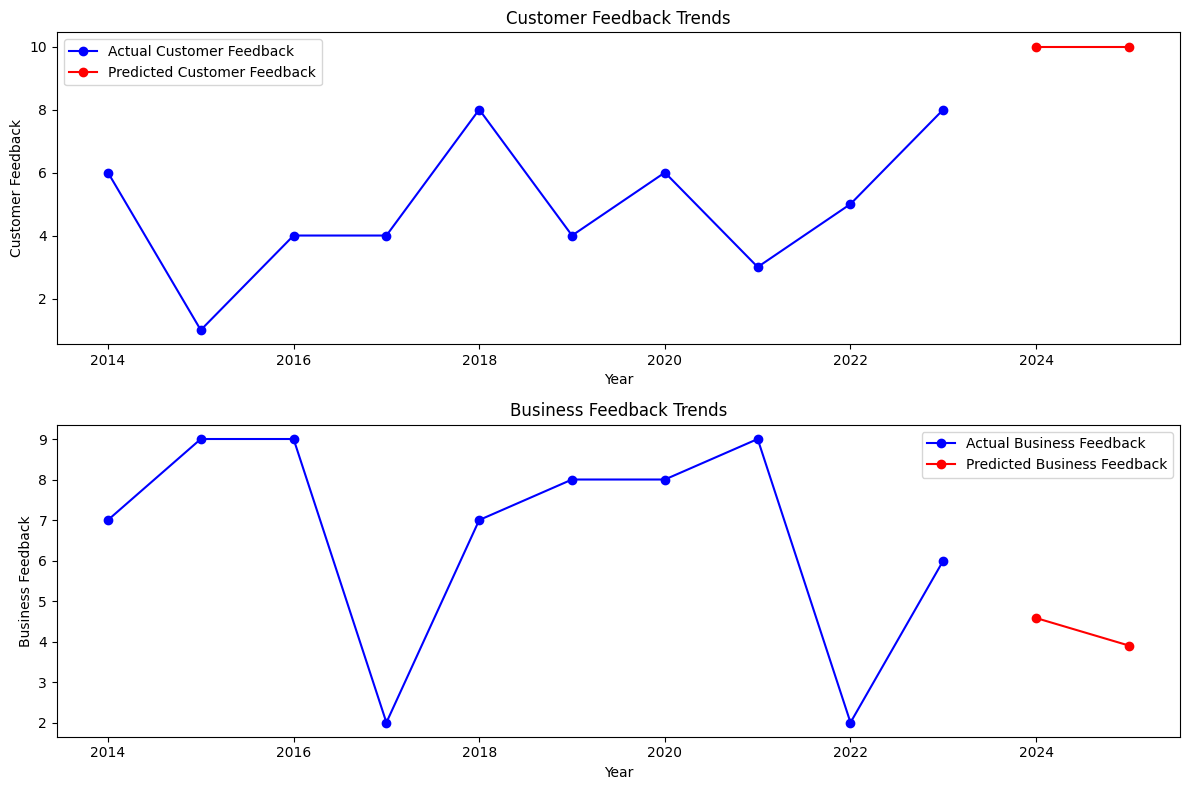

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(feedback_df['Year'], feedback_df['CustomerFeedback'], color='blue', marker='o', label='Actual Customer Feedback')
plt.plot(future_feedback_df['Year'], future_feedback_df['PredictedCustomerFeedback'], color='red', marker='o', label='Predicted Customer Feedback')
plt.xlabel('Year')
plt.ylabel('Customer Feedback')
plt.title('Customer Feedback Trends')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(feedback_df['Year'], feedback_df['BusinessFeedback'], color='blue', marker='o', label='Actual Business Feedback')
plt.plot(future_feedback_df['Year'], future_feedback_df['PredictedBusinessFeedback'], color='red', marker='o', label='Predicted Business Feedback')
plt.xlabel('Year')
plt.ylabel('Business Feedback')
plt.title('Business Feedback Trends')
plt.legend()

plt.tight_layout()
plt.show()